In [1]:
#Importing necessary library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import chardet

In [2]:
with open('mail_data.csv', 'rb') as f:    # Opens the dataset in binary read mode and file object assigned as f
      encoding = chardet.detect(f.read())['encoding']   #analyzes the byte sequence and attempts to determine the encoding used

In [3]:
df_data = pd.read_csv('mail_data.csv', encoding=encoding)

In [4]:
df_data['texts'].value_counts()

texts
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.        

In [5]:
df_data.head(10)

,id,texts,spam
0,1,"Go until jurong point, crazy.. Available only ...",1
1,2,Ok lar... Joking wif u oni...,1
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,4,U dun say so early hor... U c already then say...,1
4,5,"Nah I don't think he goes to usf, he lives aro...",1
5,6,FreeMsg Hey there darling it's been 3 week's n...,0
6,7,Even my brother is not like to speak with me. ...,1
7,8,As per your request 'Melle Melle (Oru Minnamin...,1
8,9,WINNER!! As a valued network customer you have...,0
9,10,Had your mobile 11 months or more? U R entitle...,0


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5572 non-null   int64 
 1   texts   5572 non-null   object
 2   spam    5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


# Cleaning The dataset

In [7]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [8]:
def process_emails():
    df_data['text'] = df_data['texts'].str.replace('[^A-Za-z0-9 ]', '')
    df_data['text'] = df_data['text'].str.replace('@[a-zA-Z0-9]+', '')

In [9]:
import re
print("Text before filtering:\nouch...junior is angryð#got7 #junior #yugyo..., @user")
print("\n\nText after filtering:")
re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", "","ouch... junior is angryð#got7 #junior #yugyo..., @user")

Text before filtering:
ouch...junior is angryð#got7 #junior #yugyo..., @user


Text after filtering:


'ouch junior is angrygot7 junior yugyo '

In [10]:
def process_emails(email):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",email.lower()).split())

In [11]:
df_data['text'] = df_data['texts'].apply(process_emails)

In [12]:
df_data.head(10)

,id,texts,spam,text
0,1,"Go until jurong point, crazy.. Available only ...",1,go until jurong point crazy available only in ...
1,2,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry in 2 a wkly comp to win fa cup fina...
3,4,U dun say so early hor... U c already then say...,1,u dun say so early hor u c already then say
4,5,"Nah I don't think he goes to usf, he lives aro...",1,nah i don t think he goes to usf he lives arou...
5,6,FreeMsg Hey there darling it's been 3 week's n...,0,freemsg hey there darling it s been 3 week s n...
6,7,Even my brother is not like to speak with me. ...,1,even my brother is not like to speak with me t...
7,8,As per your request 'Melle Melle (Oru Minnamin...,1,as per your request melle melle oru minnaminun...
8,9,WINNER!! As a valued network customer you have...,0,winner as a valued network customer you have b...
9,10,Had your mobile 11 months or more? U R entitle...,0,had your mobile 11 months or more u r entitled...


In [13]:
drop_features(['id','texts'],df_data)

In [14]:
df_data.head(10)

,spam,text
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,u dun say so early hor u c already then say
4,1,nah i don t think he goes to usf he lives arou...
5,0,freemsg hey there darling it s been 3 week s n...
6,1,even my brother is not like to speak with me t...
7,1,as per your request melle melle oru minnaminun...
8,0,winner as a valued network customer you have b...
9,0,had your mobile 11 months or more u r entitled...


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [16]:
df_data['text'] = df_data['text'].apply(lambda x: x.split())
df_data.head(10)

,spam,text
0,1,"[go, until, jurong, point, crazy, available, o..."
1,1,"[ok, lar, joking, wif, u, oni]"
2,0,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,1,"[nah, i, don, t, think, he, goes, to, usf, he,..."
5,0,"[freemsg, hey, there, darling, it, s, been, 3,..."
6,1,"[even, my, brother, is, not, like, to, speak, ..."
7,1,"[as, per, your, request, melle, melle, oru, mi..."
8,0,"[winner, as, a, valued, network, customer, you..."
9,0,"[had, your, mobile, 11, months, or, more, u, r..."


# Pre Processing the dataset

In [17]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
df_data['text']= df_data['text'].apply(lambda x: [stemmer.stem(i) for i in x])
df_data.head(10)

,spam,text
0,1,"[go, until, jurong, point, crazi, avail, onli,..."
1,1,"[ok, lar, joke, wif, u, oni]"
2,0,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,1,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,1,"[nah, i, don, t, think, he, goe, to, usf, he, ..."
5,0,"[freemsg, hey, there, darl, it, s, been, 3, we..."
6,1,"[even, my, brother, is, not, like, to, speak, ..."
7,1,"[as, per, your, request, mell, mell, oru, minn..."
8,0,"[winner, as, a, valu, network, custom, you, ha..."
9,0,"[had, your, mobil, 11, month, or, more, u, r, ..."


In [18]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
import string

def process(text):
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    nopunc = " ".join(nopunc)
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

df_data['text'] = df_data['text'].apply(process)
df_data.head(10)

,spam,text
0,1,"[jurong, point, got, onli, e, la, bugi, avail,..."
1,1,"[joke, u, wif, oni, lar, ok]"
2,0,"[08452810075over18, 87121, free, std, txt, que..."
3,1,"[say, earli, u, alreadi, hor, c, dun]"
4,1,"[live, though, nah, goe, usf, think, around]"
5,0,"[freemsg, 50, std, back, 3, like, fun, still, ..."
6,1,"[patent, brother, like, treat, aid, even, speak]"
7,1,"[copi, oru, per, nurungu, vettam, set, friend,..."
8,0,"[call, valu, custom, 12, 09061701461, winner, ..."
9,0,"[call, camera, updat, free, mobil, latest, 11,..."


In [20]:
def join_tokens(emails):
    return " ".join(emails)

df_data['text'] = df_data['text'].apply(join_tokens)

In [21]:
df_data.head(10)

,spam,text
0,1,jurong point got onli e la bugi avail crazi gr...
1,1,joke u wif oni lar ok
2,0,08452810075over18 87121 free std txt question ...
3,1,say earli u alreadi hor c dun
4,1,live though nah goe usf think around
5,0,freemsg 50 std back 3 like fun still chgs rcv ...
6,1,patent brother like treat aid even speak
7,1,copi oru per nurungu vettam set friend mell 9 ...
8,0,call valu custom 12 09061701461 winner code on...
9,0,call camera updat free mobil latest 11 month c...


In [22]:
from sklearn.model_selection import train_test_split    # Splitting the dataset into train and test

x_train, x_test, y_train, y_test = train_test_split(df_data["text"],df_data["spam"], test_size = 0.2, random_state = 42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(4457, 6302)
(4457, 6302)


In [24]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(1115, 6302)
(1115, 6302)


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [26]:
predDT = model1.predict(x_test_tfidf)

In [27]:
c_m1 = confusion_matrix(y_test,predDT)
print(c_m1)

[[120  29]
 [  6 960]]


In [28]:
accuracy_score(y_test,predDT)

0.968609865470852

# K nearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [30]:
K = []
training = []
test = []
scores = {}

for k in range(2, 10):
    model2 = KNeighborsClassifier(n_neighbors = k)
    model2.fit(x_train_tfidf,y_train)


    predKNN = model2.predict(x_test_tfidf)
    test_score = model2.score(x_test_tfidf, y_test)
    K.append(k)


    test.append(test_score)

In [31]:
c_m2 = confusion_matrix(y_test,predKNN)
print(c_m2)

print("\n\nAccuracy:")
print(test)

[[ 26 123]
 [  0 966]]


Accuracy:
[0.9524663677130045, 0.9282511210762332, 0.9282511210762332, 0.9139013452914798, 0.9139013452914798, 0.9022421524663677, 0.9022421524663677, 0.8896860986547085]


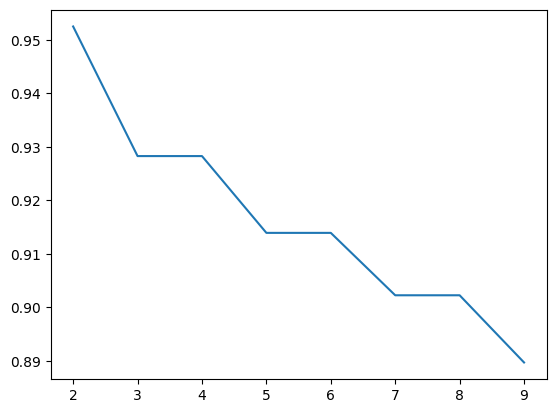

In [32]:
plt.plot(range(2,10),test)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=200)
model3.fit(x_train_tfidf,y_train)
predRF = model3.predict(x_test_tfidf)

from sklearn.metrics import confusion_matrix,f1_score
c_m3 = confusion_matrix(y_test,predRF)
c_m3

array([[129,  20],
       [  0, 966]])

In [34]:
accuracy_score(y_test,predRF)

0.9820627802690582

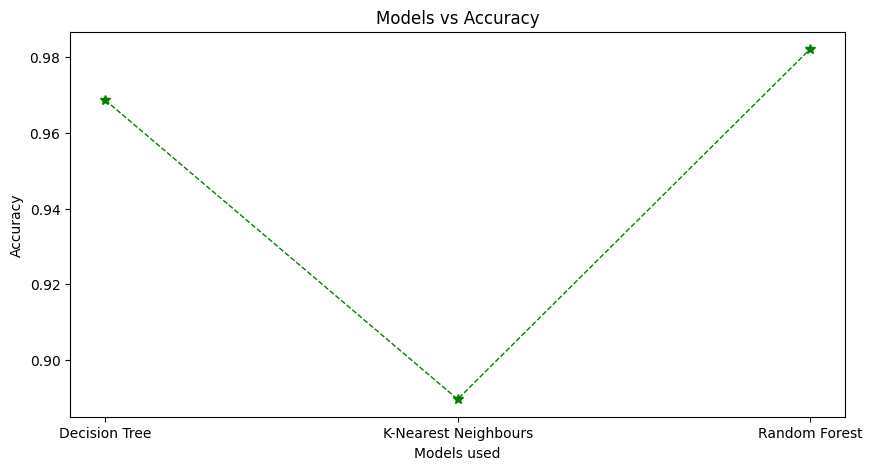

In [35]:
mod_accuracy=[accuracy_score(y_test,predDT),accuracy_score(y_test,predKNN),accuracy_score(y_test,predRF)]
models=["Decision Tree","K-Nearest Neighbours","Random Forest"]

plt.figure(figsize=(10,5))
plt.plot(models,mod_accuracy,'g*',linestyle='dashed',linewidth=1, markersize=7)
plt.xlabel("Models used")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()

In [36]:
tp,fn,fp,tn = c_m3[0][0],c_m3[0][1],c_m3[1][0],c_m3[1][1]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1score = 2 * (recall * precision) / (recall + precision)
print("recall = ",recall)
print("precision = ", precision)
print("F1_score = ", f1score)

recall =  0.8657718120805369
precision =  1.0
F1_score =  0.9280575539568345


# Using Pipeline

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [38]:
rf=RandomForestClassifier()
kn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
cv = CountVectorizer()

In [39]:
pipe = make_pipeline(cv, rf)

In [40]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [41]:
y_pred = pipe.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.979372197309417

In [43]:
import pickle
pickle.dump(pipe, open("final.pkl",'wb'))